### Project on Decision Tree,Random forest,Boosting

In [1]:
import os
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset/BreastCancerPrediction/Breast Cancer Prediction/Dataset")
import pandas as pd

df=pd.read_csv("cancer.csv")

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.shape

(569, 33)

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [40]:
print('The no of people who t has no  cancer and the cells have a harmful effect',(1-212/569)*100,'percent of total people')

The no of people who t has no  cancer and the cells have a harmful effect 62.741652021089635 percent of total people


In [39]:
print('The no of people who t has   cancer and the cells have a harmful effect',(1-375/569)*100,'percent of total people')

The no of people who t has   cancer and the cells have a harmful effect 34.09490333919156 percent of total people


In [11]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
df.loc[df['diagnosis']=='B','diagnosis']=0
df.loc[df['diagnosis']=="M","diagnosis"]=1

In [15]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
train_y=df["diagnosis"]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=50)

### Decision Tree Classicifier

In [23]:
from sklearn import tree

In [24]:
dt=tree.DecisionTreeClassifier()  ### create model object

In [26]:
import numpy as np
y_train=y_train.astype(np.number)

In [27]:
y_train.dtype

dtype('float64')

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pre=dt.predict(X_test)

In [31]:
y_pre[0:5]

array([1., 0., 1., 0., 0.])

In [30]:
y_test[0:5]

356    0
556    0
283    1
495    0
364    0
Name: diagnosis, dtype: object

In [32]:
y_pre=y_pre.astype(np.number)

<ipython-input-32-10e3e1fe95ca>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_pre=y_pre.astype(np.number)


In [33]:
y_test=y_test.astype(np.number)

In [34]:
from sklearn import metrics

In [35]:
print("Accuracy",metrics.accuracy_score(y_test,y_pre))
print("precision",metrics.precision_score(y_test,y_pre))
print("Recall",metrics.recall_score(y_test,y_pre))

Accuracy 0.9005847953216374
precision 0.8387096774193549
Recall 0.8813559322033898


In [36]:
import matplotlib.pyplot as plt


In [37]:
from sklearn import tree

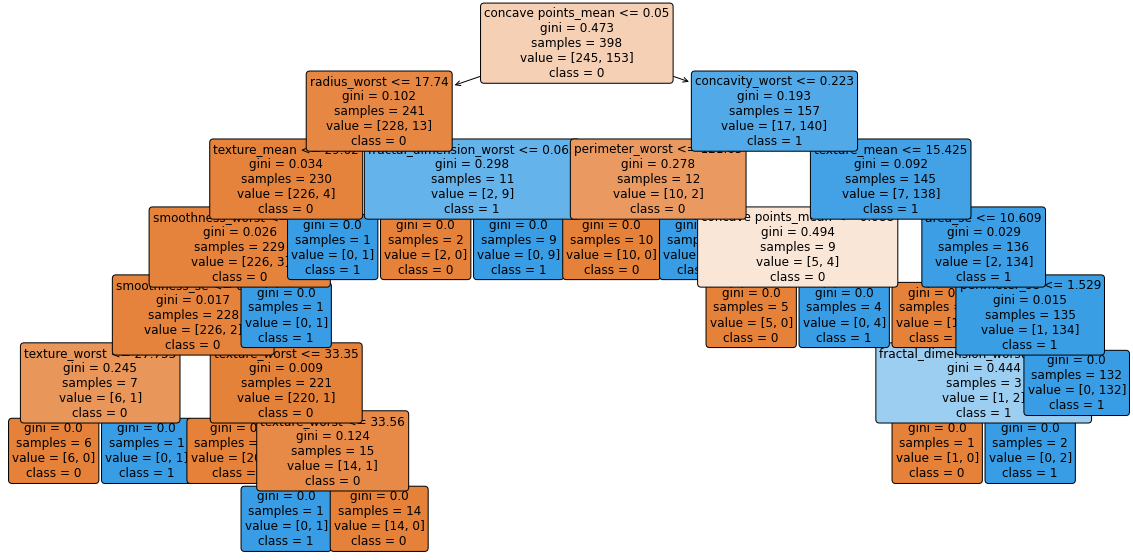

In [41]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               filled=True,rounded=True,feature_names=X_train.columns,class_names=["0","1"],fontsize=12)
plt.show()

### Hyperparameter tuning 

In [42]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [43]:
## create function to generate report
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results["rank_test_score"]==i)
        for candidate in candidates:
            print("model with rank:{0: .3f} (std: {1: .3f})".format(results["mean_test_score"][candidate],
                                                                   results["std_test_score"][candidate]))
            print("Parameters: {0}" .format(results["params"][candidate]))
            print("")
    

### Randomized search

In [44]:
## specipy parameter and distribution to sample fram
param_dist={"max_depth":[3,None],                ##try [3,4,5,None] 
           "max_features":sp_randint(1,11),
           "min_samples_split":sp_randint(2,11),
           "criterion":["gini","entropy"]}

In [45]:
## run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [46]:
start=time()
random_search.fit(X_train,y_train)
print("Randomized search too %.2f second for %d candidates" "parameter setting."%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 1.31 second for 20 candidatesparameter setting.
model with rank: 0.955 (std:  0.026)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 8}

model with rank: 0.947 (std:  0.024)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 5}

model with rank: 0.947 (std:  0.014)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 6}



### Grid Search

In [47]:
## specipy parameter and distribution to sample fram
param_grid={"max_depth":[4,None],                ##try [3,4,5,None] 
           "max_features":[1,3,10],
           "min_samples_split":[2,3,10],
           "criterion":["gini","entropy"]}

In [48]:
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [49]:
start=time()
grid_search.fit(X_train,y_train)
print("GridSearchCV search took %.2f second for %d candidate" "parameter settings."%((time()-start),
                                                                                     len(grid_search.cv_results_["params"])))
report(grid_search.cv_results_)

GridSearchCV search took 1.93 second for 36 candidateparameter settings.
model with rank: 0.942 (std:  0.036)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 10}

model with rank: 0.940 (std:  0.040)
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 2}

model with rank: 0.940 (std:  0.009)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}



In [ ]:
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 8}


In [50]:
dt_grid_search=tree.DecisionTreeClassifier(criterion= 'gini', max_depth=3, max_features= 9, min_samples_split= 8)

In [51]:
dt_grid_search.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=9, min_samples_split=8)

In [52]:
y_pred_gs=dt_grid_search.predict(X_test)

In [53]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred_gs))
print("precision",metrics.precision_score(y_test,y_pred_gs))
print("Recall",metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.9239766081871345
precision 0.8709677419354839
Recall 0.9152542372881356


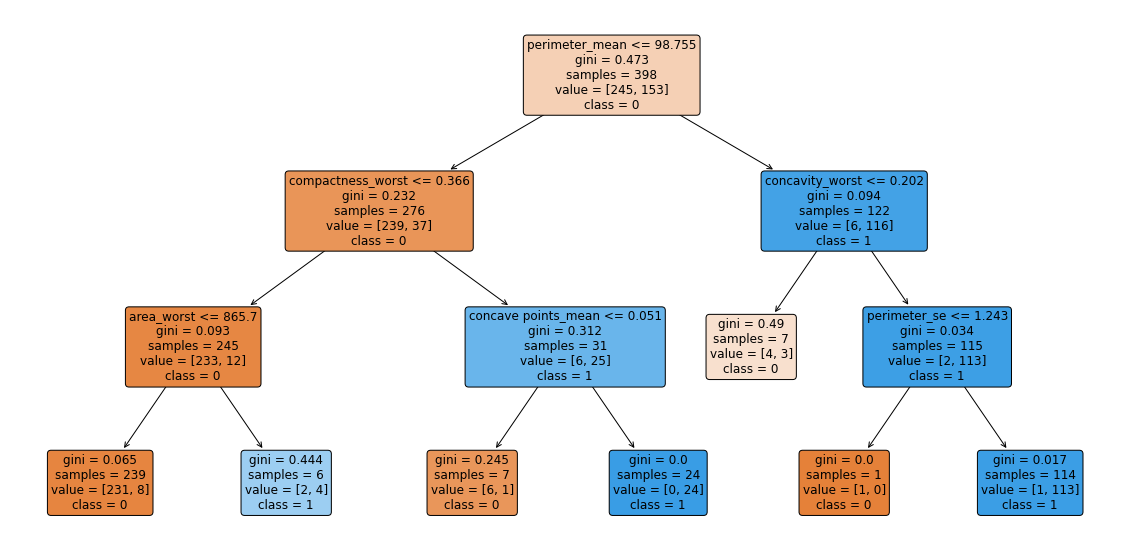

In [54]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_grid_search,
               filled=True,rounded=True,
               feature_names=X_train.columns,
               class_names=["0","1"],fontsize=12)
plt.show()

### Random Forest Classcifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier()

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
ypred=rf.predict(X_test)

In [69]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [59]:
rf.feature_importances_

array([0.04094912, 0.01564834, 0.0368942 , 0.03569581, 0.00333754,
       0.01106851, 0.06769477, 0.06362468, 0.00660321, 0.00409901,
       0.01255816, 0.00383245, 0.01795362, 0.04388796, 0.0031163 ,
       0.00627827, 0.00555338, 0.00496569, 0.00303676, 0.00580521,
       0.12656102, 0.01107896, 0.14966005, 0.08463341, 0.0122589 ,
       0.03193933, 0.04993419, 0.11700144, 0.01496106, 0.00936864])

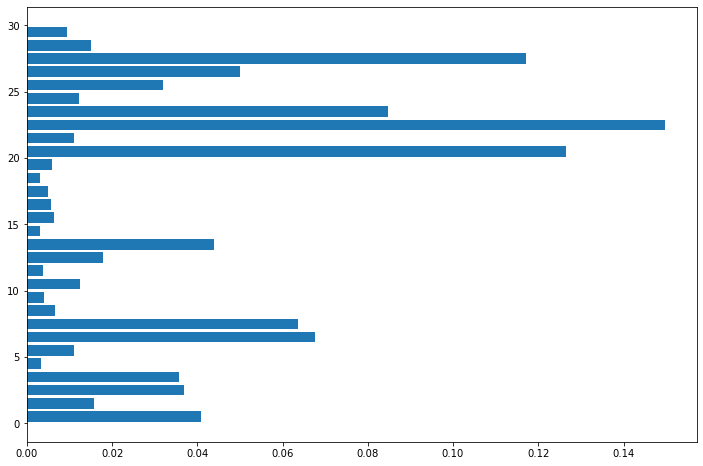

In [60]:
feature_importance=rf.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+ .5
fig=plt.figure(figsize=(12,8))
plt.barh(pos,feature_importance,align="center")

plt.show()

### Gradient Boosting

In [61]:
from sklearn import metrics

In [62]:
print("Accuracy using RF",metrics.accuracy_score(y_test,ypred))
print("precision using RF ",metrics.precision_score(y_test,ypred))
print("Recall using Rf",metrics.recall_score(y_test,ypred))

Accuracy using RF 0.9649122807017544
precision using RF  0.9491525423728814
Recall using Rf 0.9491525423728814


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [67]:
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       112
         1.0       0.93      0.95      0.94        59

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171

